# `PROYECTO INDIVIDUAL 1`
## `SISTEMA DE RECOMENDACION PELICULAS Y SERIES`

In [4]:
import numpy as np
import pandas as pd

In [5]:
df1=pd.read_csv('.\dataset\movies_dataset.csv')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19928\3961479367.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('.\dataset\movies_dataset.csv')


In [6]:
df1.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [21]:
df1['spoken_languages'][11]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]"

## `Revision General de los Datos`

In [7]:
# Tamaño de df1

print('Tamaño: (Filas, Columnas)',df1.shape)

# Obtener un resumen de información del DataFrame
summary = df1.describe()

# Imprimir el resumen de información
print(summary)

# Obtener los tipos de datos de cada columna
dtypes = df1.dtypes
print("Tipos de datos de cada columna:")
print(dtypes)

Tamaño: (Filas, Columnas) (45466, 24)
            revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000
Tipos de datos de cada columna:
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_pa

### `Registros duplicados`

In [12]:
from IPython.display import display

registros_iguales1 = df1[df1.duplicated(keep=False)]
cantidad_filas_iguales = len(registros_iguales1)

print("Cantidad de filas con los mismos valores en todas las columnas:", cantidad_filas_iguales)

print("Registros con los mismos valores en todas las columnas:")
display(registros_iguales1.head(50))

Cantidad de filas con los mismos valores en todas las columnas: 25
Registros con los mismos valores en todas las columnas:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
7345,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
8068,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
13261,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13603,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,168538,tt0084387,en,Nana,"In Zola's Paris, an ingenue arrives at a tony ...",...,1983-06-13,0.0,92.0,[],Released,NaN,"Nana, the True Key of Pleasure",False,4.7,3.0
14000,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.daysofdarknessthemovie.com/,18440,tt0499456,en,Days of Darkness,When a comet strikes Earth and kicks up a clou...,...,2007-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Days of Darkness,False,5.0,5.0


In [6]:
# Generar el archivo XLS para revisarlos detalladamente
nombre_archivo = 'repetidos.xls'
registros_iguales1.to_excel(nombre_archivo, index=False, engine='openpyxl')

print("Archivo XLS generado correctamente.")


Archivo XLS generado correctamente.


In [7]:
# Contar la cantidad de registros duplicados
cantidad_registros_duplicados = len(df1) - len(df1.drop_duplicates(keep='first'))

# Eliminar registros duplicados y conservar solo el primero
df_sin_duplicados = df1.drop_duplicates(keep='first')

print("Cantidad de registros eliminados:", cantidad_registros_duplicados)
print("Registros sin duplicados:")
display(df_sin_duplicados.head)

Cantidad de registros eliminados: 13
Registros sin duplicados:


<bound method NDFrame.head of        adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                             

   ### `6) Eliminar las columnas que no seran utilizadas,` 

### ` video,imdb_id,adult,original_title,poster_path y homepage.`

In [8]:
# Eliminar las columnas especificadas
columns_to_drop = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
df1 = df1.drop(columns_to_drop, axis=1)

# Visualizar el DataFrame después de eliminar las columnas
print("\nDataFrame después de eliminar las columnas:")
dtypes = df1.dtypes
print(dtypes)



DataFrame después de eliminar las columnas:
belongs_to_collection     object
budget                    object
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
dtype: object


### `2) Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0`

### `2.1 Columna Budget`

In [9]:
# Vamos a revisar columna budget

In [10]:
print(df1['budget'].head(5))
print(df1['budget'].shape)

0    30000000
1    65000000
2           0
3    16000000
4           0
Name: budget, dtype: object
(45466,)


In [11]:
### Al revisar los valores en power query detectamos valores alfanumericos, la idea es convertir esos valores, 
### los vacios y los nulos a 0 y convertir esa columna a float para poder operar numericamente con ellos

In [12]:
import re

# Función para identificar valores no numéricos en una cadena y contarlos

def identify_non_numeric(value):
    count_non_numeric = 0
    if isinstance(value, (int, float)):
        value = str(value)
    pattern = r'[^0-9.,]'
    if re.search(pattern, value):
        count_non_numeric += 1
        return 0
    else:
        return value

# Aplicar la función a la columna "budget"
df1['budget'] = df1['budget'].apply(identify_non_numeric)

# Contar los valores no numéricos encontrados
count_non_numeric = df1['budget'].value_counts()[0]

print("Cantidad de valores no numéricos encontrados en la columna 'budget':", count_non_numeric)
print(df1['budget'])


Cantidad de valores no numéricos encontrados en la columna 'budget': 3
0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object


In [13]:
# Convertir la columna "budget" a tipo float
df1['budget'] = df1['budget'].astype(float)

print(df1['budget'].head(5))
print(df1['budget'].shape)

0    30000000.0
1    65000000.0
2           0.0
3    16000000.0
4           0.0
Name: budget, dtype: float64
(45466,)


In [14]:
# Configurar el formato de pandas para evitar la notación exponencial
pd.options.display.float_format = '{:.2f}'.format

# Generar el resumen estadístico
summary1 = df1.describe()

# Mostrar el resumen estadístico de las columnas numericas
print(summary1)

            budget       revenue  runtime  vote_average  vote_count
count     45466.00      45460.00 45203.00      45460.00    45460.00
mean    4224300.06   11209348.54    94.13          5.62      109.90
std    17423591.55   64332246.74    38.41          1.92      491.31
min           0.00          0.00     0.00          0.00        0.00
25%           0.00          0.00    85.00          5.00        3.00
50%           0.00          0.00    95.00          6.00       10.00
75%           0.00          0.00   107.00          6.80       34.00
max   380000000.00 2787965087.00  1256.00         10.00    14075.00


### `2.1 Columna revenue`

In [15]:
print(df1['revenue'].head(5))
print(df1['revenue'].shape)

0   373554033.00
1   262797249.00
2           0.00
3    81452156.00
4    76578911.00
Name: revenue, dtype: float64
(45466,)


In [16]:
# Verificar valores nulos y vacíos en las columnas "budget" y "revenue"
valores_nulos_vacios_budget = df1['budget'].isna().any() or df1['budget'].eq('').any()
valores_nulos_vacios_revenue = df1['revenue'].isna().any() or df1['revenue'].eq('').any()

# Mostrar los resultados
print("¿Hay valores nulos o vacíos en la columna 'budget'?", valores_nulos_vacios_budget)
print("¿Hay valores nulos o vacíos en la columna 'revenue'?", valores_nulos_vacios_revenue)

¿Hay valores nulos o vacíos en la columna 'budget'? False
¿Hay valores nulos o vacíos en la columna 'revenue'? True


In [17]:
# Reemplazar los valores nulos o vacíos por 0 en la columna "revenue"
df1['revenue'] = df1['revenue'].fillna(0)


In [18]:
# Verificar valores nulos y vacíos en la columna"revenue"

valores_nulos_vacios_revenue = df1['revenue'].isnull().any() or df1['revenue'].eq('').any()

print("¿Existen valores nulos o vacíos en la columna 'revenue'?", valores_nulos_vacios_revenue)

valores_nulos_vacios_revenue = df1['revenue'].isna().any() or df1['revenue'].eq('').any()



¿Existen valores nulos o vacíos en la columna 'revenue'? False


In [19]:
# Generar el resumen estadístico
summary3 = df1.describe()

# Mostrar el resumen estadístico de las columnas numericas
print(summary3)

            budget       revenue  runtime  vote_average  vote_count
count     45466.00      45466.00 45203.00      45460.00    45460.00
mean    4224300.06   11207869.28    94.13          5.62      109.90
std    17423591.55   64328130.52    38.41          1.92      491.31
min           0.00          0.00     0.00          0.00        0.00
25%           0.00          0.00    85.00          5.00        3.00
50%           0.00          0.00    95.00          6.00       10.00
75%           0.00          0.00   107.00          6.80       34.00
max   380000000.00 2787965087.00  1256.00         10.00    14075.00


In [20]:
# el numero de registros de revenue paso a 45466 quedando la totalidad de registros sin vacios, lo mismo que la columna budget

### `5) Crear la columna con el retorno de inversión, llamada return `

### `con los campos revenue y budget, dividiendo estas dos últimas revenue / budget`

### `cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.`

In [21]:
# Dividimos y en el caso de que budget sea 0 rellenamos el valor de return con 0
df1['return'] = np.where(df1['budget'] != 0, df1['revenue'] / df1['budget'], 0)


In [22]:
# Verifica que columnas hay y el tipo de datos de cada columna
tipos_de_datos = df1.dtypes
num_columns = len(df1.columns)
print("Número de columnas del df:",num_columns)
print(tipos_de_datos)

Número de columnas del df: 19
belongs_to_collection     object
budget                   float64
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
return                   float64
dtype: object


In [23]:
# Mostrar el resumen estadístico de las columnas revenue. budget y return
subset = df1[["revenue", "budget", "return"]]
summary4 = subset.describe()

print(summary4)

            revenue       budget      return
count      45466.00     45466.00    45466.00
mean    11207869.28   4224300.06      658.74
std     64328130.52  17423591.55    74619.33
min            0.00         0.00        0.00
25%            0.00         0.00        0.00
50%            0.00         0.00        0.00
75%            0.00         0.00        0.00
max   2787965087.00 380000000.00 12396383.00


In [24]:
# se percibe una gran cantidad de valores iguales a 0 , podemos confirmarlo con la columna return

In [25]:
count_zero = (df1["return"] == 0).sum()
print("Cantidad de valores iguales a 0 en columna return: ", count_zero)

Cantidad de valores iguales a 0 en columna return:  40085


In [26]:
# La cantidad de valores diferentes a 0 en return es de aproximadamente 5381 lo que representa casi un 10% del total de valores,
# La mayoria de peliculas que registran este valor es de peliculas con un presupuesto (budget) mayor al 75% percentil = 

In [27]:
# Concluimos que las peliculas que tienen este registro de budget y return son aquellas cuyo presupuesto esta en el rango de
# 

In [28]:
subset1 = df1[df1["budget"] != 0]
description1 = subset1["budget"].describe()
print(description1)

count        8890.00
mean     21604277.46
std      34310627.57
min             1.00
25%       2000000.00
50%       8000000.00
75%      25000000.00
max     380000000.00
Name: budget, dtype: float64


In [29]:
# El presupuesto promedio es de 21 millones de dolares pero la desviacion es de 34 millones, y el maximo es de 380 millones.
# Revisar valores para identificar y poder categorizar las peliculas en grupos segun presupuesto. Mirar por ejemplo si hay
# correlacion entre valoracion y budget o entre return y budget.

### `3) Los valores nulos del campo release_date deben eliminarse.`

In [30]:
# Quiero saber cuantos valores nulos o vacios hay en la columna: release_date
null_release_date_count = df1['release_date'].isnull().sum()

print("Valores nulos en la columna 'release_date':", null_release_date_count)


Valores nulos en la columna 'release_date': 87


In [31]:
# Crear un nuevo DataFrame que contenga los registros con valores nulos o vacíos en la columna 'release_date'
registros_nulos_vacios = df1[df1['release_date'].isna() | df1['release_date'].eq('')]

# Guardar el DataFrame en un archivo Excel
registros_nulos_vacios.to_excel('registros_nulos_vacios.xlsx', index=False)

### `4) De haber fechas, deberán tener el formato AAAA-mm-dd`

In [32]:
df1['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [33]:
# Verificamos tipo de dato de columna release_date

datos_columna = df1['release_date']

# Cuenta la cantidad de datos según el tipo de dato
data_type_countsrd = datos_columna.apply(type).value_counts()

print(data_type_countsrd)

<class 'str'>      45379
<class 'float'>       87
Name: release_date, dtype: int64


In [34]:
# Vamos a convertir valores de release_date a formato A,M,D.
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')

# El parámetro errors se establece en 'coerce', lo que significa que si alguna fecha no se puede convertir en el formato 
# especificado, se establecerá como valor NaT (Not a Time) en lugar de generar un error. Esto es útil cuando hay valores no 
# válidos o faltantes en la columna de fechas, ya que permite que la función continúe la conversión sin interrupciones.


In [35]:
df1['release_date']

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45466, dtype: datetime64[ns]

In [36]:
# Dejamos pendiente eliminar o no esos registros o convertir esos valores a 0 dependiendo de las aplicaciones o necesidad
# de la informacion

### `Crear la columna release_year donde extraerán el año de la fecha de estreno`

In [37]:
df1['release_year'] = df1['release_date'].dt.year


In [38]:
df1.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.00,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.70,5415.00,12.45,1995.00
1,NaN,65000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.90,2413.00,4.04,1995.00
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.00,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.71,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.50,92.00,0.00,1995.00


In [39]:
# Verifica que columnas hay y el tipo de datos de cada columna
tipos_de_datos = df1.dtypes
num_columns = len(df1.columns)
print("Número de columnas del df:",num_columns)
print(tipos_de_datos)

Número de columnas del df: 20
belongs_to_collection            object
budget                          float64
genres                           object
id                               object
original_language                object
overview                         object
popularity                       object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
return                          float64
release_year                    float64
dtype: object


In [40]:
# Obtener las estadísticas de la columna
estadisticas1 = df1['release_year'].describe()

# Imprimir las estadísticas
print(estadisticas1)

count   45376.00
mean     1991.88
std        24.06
min      1874.00
25%      1978.00
50%      2001.00
75%      2010.00
max      2020.00
Name: release_year, dtype: float64


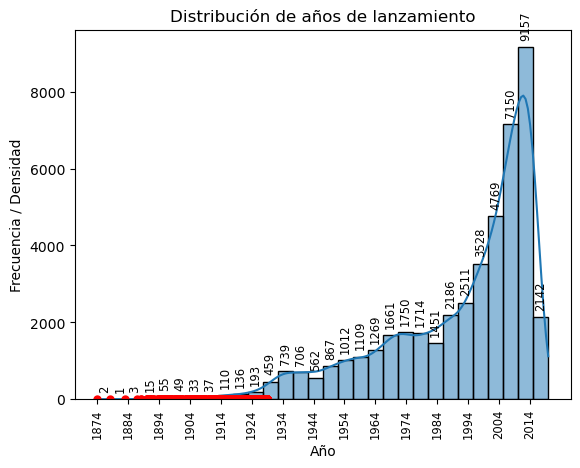

lower bound 1930.0
upper bound 2058.0


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear el histograma y la curva de densidad utilizando Seaborn
ax = sns.histplot(df1['release_year'], bins=30, kde=True)

# Convertir los valores mínimos y máximos de la columna "release_year" a enteros
min_year = int(df1['release_year'].min())
max_year = int(df1['release_year'].max())

# Configurar el título y los ejes
plt.title('Distribución de años de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia / Densidad')

# Obtener los límites del rango intercuartil (IQR)
q1 = df1['release_year'].quantile(0.25)
q3 = df1['release_year'].quantile(0.75)
iqr = q3 - q1

# Definir los límites para detectar outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Obtener los outliers
outliers = df1[(df1['release_year'] < lower_bound) | (df1['release_year'] > upper_bound)]

# Graficar los outliers
ax.plot(outliers['release_year'], np.zeros_like(outliers['release_year']), 'ro', markersize=5)

# Ajustar los labels de los ticks para que sean verticales y más pequeños
ax.set_xticks(range(min_year, max_year + 1, 10))
ax.set_xticklabels(ax.get_xticks(), rotation='vertical', fontsize='small')

# Agregar labels de valores encima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize='small', xytext=(0, 5), textcoords='offset points', rotation='vertical')

# Mostrar el histograma y la curva de densidad con outliers destacados
plt.show()
print('lower bound',lower_bound)
print('upper bound',upper_bound)


In [42]:
# Generamos archivo csv para continuar trabajando con el ultimo paso del ETl el cual es desanidar columnas JSON
nombre_archivo = 'ETL_Inicial.csv'
df1.to_csv(nombre_archivo, index=False)

print("Archivo CSV generado correctamente.")



Archivo CSV generado correctamente.


In [44]:
df1.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'return', 'release_year'],
      dtype='object')

In [27]:
# Obtener el conteo de cada tipo de dato en la columna
conteo_tipos = df1['spoken_languages'].apply(type).value_counts()

# Imprimir los resultados
print(conteo_tipos)

<class 'str'>      45460
<class 'float'>        6
Name: spoken_languages, dtype: int64
